In [208]:
#Load libraries
import pandas as pd
import nltk
import matplotlib
import numpy

In [209]:
df = pd.read_csv("small_df.csv",delimiter=',')

Import MWE Tokenizer

In [210]:
from nltk.tokenize import MWETokenizer
mw_tokenizer = nltk.tokenize.MWETokenizer()

In [211]:
#remove score 
#df.drop(index=df.index[0], axis=0, inplace=True)
df.drop(index=[0], inplace=True)


In [360]:
#loop through csv to extract words
##turn the csv into a dictionary
all_doc = df.to_dict(orient='list')

def get_key(val):
    for key, value in all_doc.items():
        if val == value:
            return key
   
##key is header and value is an array of the type (string,POStag) after lemmazation
for val in all_doc.values():
    key = get_key(val)
    val = ' '.join(val)
    val = val.split(" ")
    res = []   #remove "\n"
    for token in val:
        res.append(token.replace('\\n', " "))
    val = ' '.join(res)
    #val = val.split(" ")
    print(val)
    all_doc[key] = val

#split text base on space

['Fancy', 'ambient,', 'good', 'sushi/sashimi.', 'True', 'that', 'the', 'rolls', 'come', 'with', 'plastic', 'and', 'you', 'need', 'to', 'remove', 'before', 'eating', 'them,', 'what', 'might', 'give', 'you', 'the', 'feeling', 'of', 'a', 'cheap', 'place.', 'However', 'the', 'quality', 'is', 'good', 'in', 'my', 'opinion.', 'I', 'recommend.', '[5,', "'One", 'of', 'my', 'favorite', 'Japanese', 'restaurant', 'Their', 'price', 'is', 'reasonable,', 'and', 'so', 'far', 'I', 'never', 'disappointed', 'with', 'my', 'order.', 'The', 'service', 'is', 'also', "professional.']", '[4,', "'good", 'japanese', 'food', 'serve', 'in', 'nice', "portion']", '[3,', "'Nice", 'ambience,', 'music’s', 'volume', 'can', 'be', 'a', 'bit', 'lower.', 'Service', 'is', 'average.', 'Good', 'attitude', 'but', 'slightly', 'annoying', 'service', 'quality.', 'Food', 'is', 'average.', 'Nothing', 'terrible', 'about', 'it.', 'Ingredients', 'are', 'fresh.', 'Sushi', 'is', 'standard.', 'Rolls', 'are', 'not', 'exactly', 'traditional

In [339]:
all_doc

{'十六區和風料理': ['Fancy',
  'ambient,',
  'good',
  'sushi/sashimi.',
  'True',
  'that',
  'the',
  'rolls',
  'come',
  'with',
  'plastic',
  'and',
  'you',
  'need',
  'to',
  'remove',
  'before',
  'eating',
  'them,',
  'what',
  'might',
  'give',
  'you',
  'the',
  'feeling',
  'of',
  'a',
  'cheap',
  'place.',
  'However',
  'the',
  'quality',
  'is',
  'good',
  'in',
  'my',
  'opinion.',
  'I',
  'recommend.',
  '[5,',
  "'One",
  'of',
  'my',
  'favorite',
  'Japanese',
  'restaurant\\nTheir',
  'price',
  'is',
  'reasonable,',
  'and',
  'so',
  'far',
  'I',
  'never',
  'disappointed',
  'with',
  'my',
  'order.\\nThe',
  'service',
  'is',
  'also',
  "professional.']",
  '[4,',
  "'good",
  'japanese',
  'food\\nserve',
  'in',
  'nice',
  "portion']",
  '[3,',
  "'Nice",
  'ambience,',
  'music’s',
  'volume',
  'can',
  'be',
  'a',
  'bit',
  'lower.\\nService',
  'is',
  'average.',
  'Good',
  'attitude',
  'but',
  'slightly',
  'annoying',
  'service',
  '

In [213]:
!pip3 install spacy

import spacy

In [324]:
#lemmazation
nlp = spacy.load("en_core_web_sm")
for val in all_doc.values():
    key = get_key(val)
    all_doc[key] = [(token.lemma_,token.pos_) for token in nlp(val)]

In [325]:
all_doc

{'十六區和風料理': [('fancy', 'ADJ'),
  ('ambient', 'NOUN'),
  (',', 'PUNCT'),
  ('good', 'ADJ'),
  ('sushi', 'PROPN'),
  ('/', 'SYM'),
  ('sashimi', 'PROPN'),
  ('.', 'PUNCT'),
  ('true', 'ADJ'),
  ('that', 'SCONJ'),
  ('the', 'DET'),
  ('roll', 'NOUN'),
  ('come', 'VERB'),
  ('with', 'ADP'),
  ('plastic', 'NOUN'),
  ('and', 'CCONJ'),
  ('you', 'PRON'),
  ('need', 'VERB'),
  ('to', 'PART'),
  ('remove', 'VERB'),
  ('before', 'ADP'),
  ('eat', 'VERB'),
  ('they', 'PRON'),
  (',', 'PUNCT'),
  ('what', 'PRON'),
  ('might', 'AUX'),
  ('give', 'VERB'),
  ('you', 'PRON'),
  ('the', 'DET'),
  ('feeling', 'NOUN'),
  ('of', 'ADP'),
  ('a', 'DET'),
  ('cheap', 'ADJ'),
  ('place', 'NOUN'),
  ('.', 'PUNCT'),
  ('however', 'ADV'),
  ('the', 'DET'),
  ('quality', 'NOUN'),
  ('be', 'AUX'),
  ('good', 'ADJ'),
  ('in', 'ADP'),
  ('my', 'PRON'),
  ('opinion', 'NOUN'),
  ('.', 'PUNCT'),
  ('I', 'PRON'),
  ('recommend', 'VERB'),
  ('.', 'PUNCT'),
  ('[', 'X'),
  ('5', 'NUM'),
  (',', 'PUNCT'),
  ("'", 'PUNCT'),

In [328]:
#remove stop-words
!pip3 install stop-words
from stop_words import get_stop_words
stopwords = get_stop_words('english')

for val in all_doc.values():
    key = get_key(val)
    all_doc[key] = [word for word in val if not word[0] in stopwords]


('fancy', 'ADJ')


In [331]:
#visulization of the frequence of tokens
poll_doc = []
for val in all_doc.values():
    poll_doc+= [word[0] for word in val]

from nltk import FreqDist
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4)) 
parameters = {'axes.labelsize': 15,
          'axes.titlesize': 35}
plt.rcParams.update(parameters)

fdist2 = FreqDist(poll_doc)

<Figure size 400x400 with 0 Axes>

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


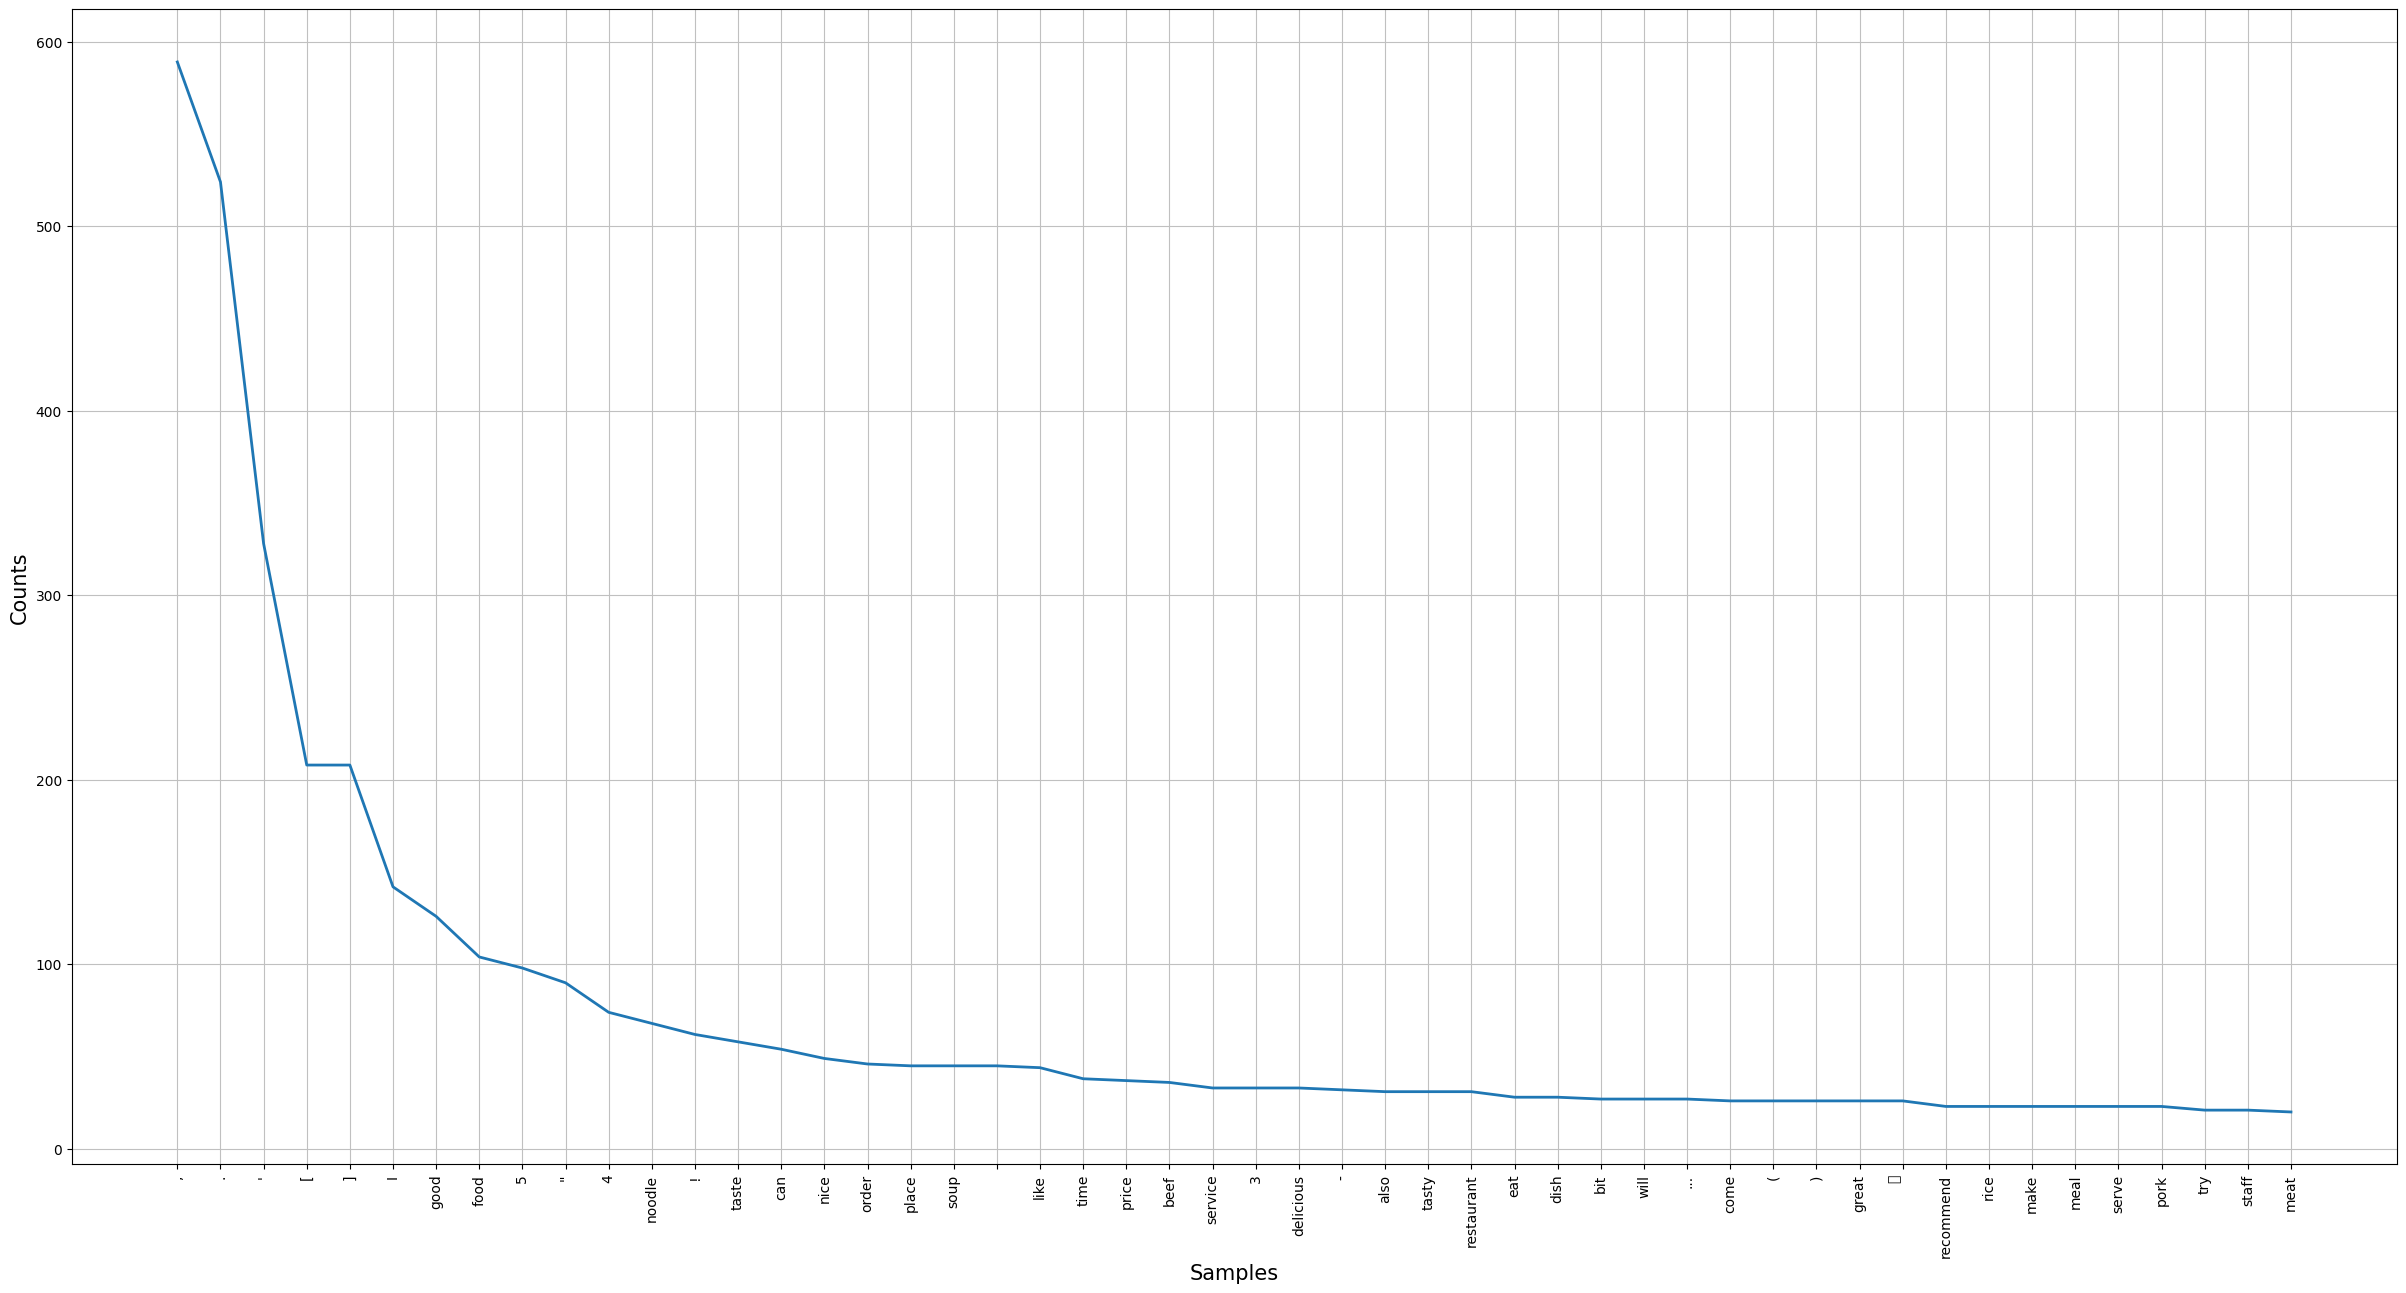

<Axes: xlabel='Samples', ylabel='Counts'>

In [332]:
plt.rcParams["figure.figsize"] = (30, 15)
fdist2.plot(50, cumulative=False)

In [334]:
#add more stopwords
num = []
for i in range(10):
    num+=str(i)
additional_stopwords = [".",",","'","[","]","(",")","..."," ","\""]+num

for val in all_doc.values():
    key = get_key(val)
    all_doc[key] = [word for word in val if not word[0] in additional_stopwords]

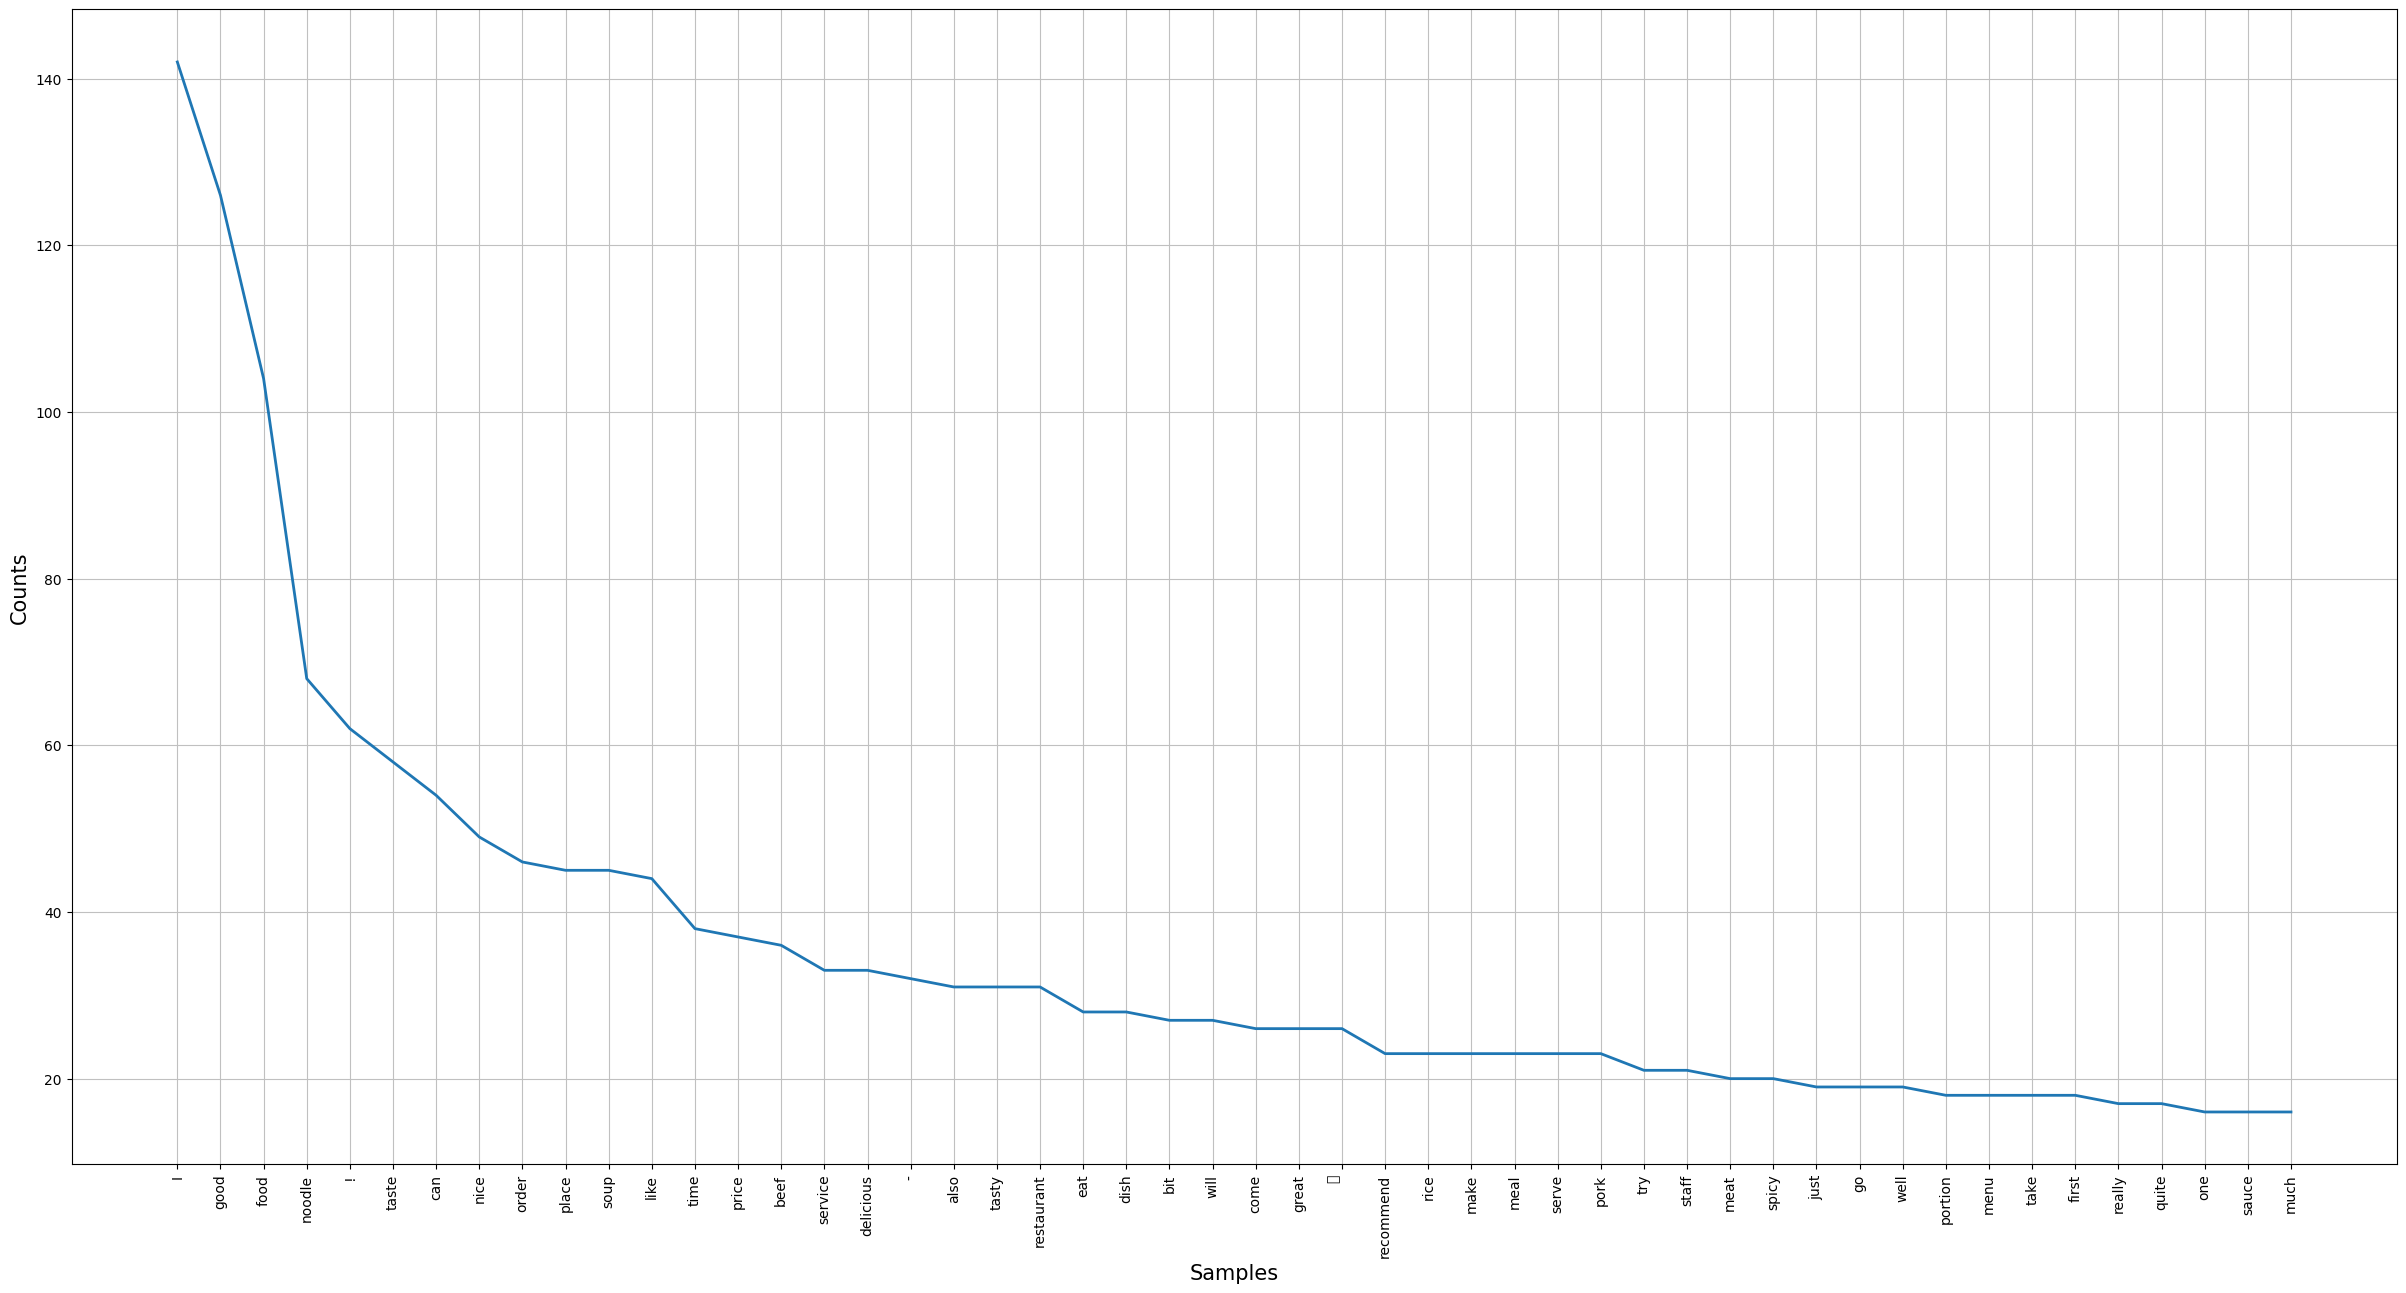

<Axes: xlabel='Samples', ylabel='Counts'>

In [335]:
poll_doc2 = []
for val in all_doc.values():
    poll_doc2+=[word[0] for word in val]

fdist = FreqDist(poll_doc2)
fdist.plot(50, cumulative=False)

In [336]:
#select Nouns/Adjectives with POS tagging
for val in all_doc.values():
    key = get_key(val)
    all_doc[key] = [bi for bi in val if bi[1]=="ADJ"]+[bi for bi in val if bi[1]=="PROPN"]+[bi for bi in val if bi[1]=="NOUN"]

In [337]:
all_doc

{'十六區和風料理': [('fancy', 'ADJ'),
  ('good', 'ADJ'),
  ('true', 'ADJ'),
  ('cheap', 'ADJ'),
  ('good', 'ADJ'),
  ('favorite', 'ADJ'),
  ('japanese', 'ADJ'),
  ('restaurant\\ntheir', 'ADJ'),
  ('reasonable', 'ADJ'),
  ('professional', 'ADJ'),
  ('good', 'ADJ'),
  ('japanese', 'ADJ'),
  ('nice', 'ADJ'),
  ('nice', 'ADJ'),
  ('average', 'ADJ'),
  ('good', 'ADJ'),
  ('annoying', 'ADJ'),
  ('average', 'ADJ'),
  ('terrible', 'ADJ'),
  ('fresh', 'ADJ'),
  ('standard', 'ADJ'),
  ('traditional', 'ADJ'),
  ('japanese', 'ADJ'),
  ('ok', 'ADJ'),
  ('sushi', 'PROPN'),
  ('sashimi', 'PROPN'),
  ('Sushi', 'PROPN'),
  ('ambient', 'NOUN'),
  ('roll', 'NOUN'),
  ('plastic', 'NOUN'),
  ('feeling', 'NOUN'),
  ('place', 'NOUN'),
  ('quality', 'NOUN'),
  ('opinion', 'NOUN'),
  ('price', 'NOUN'),
  ('order.\\nthe', 'NOUN'),
  ('service', 'NOUN'),
  ('food\\nserve', 'NOUN'),
  ('portion', 'NOUN'),
  ('ambience', 'NOUN'),
  ('music', 'NOUN'),
  ('volume', 'NOUN'),
  ('bit', 'NOUN'),
  ('lower.\\nservice', 'NOUN')